In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from preprocessing import preprocess

In [2]:
df = final_preprocessing("../data/raw/atp_tennis.csv")

In [3]:
df['target'] =  (df['Winner'] == df['Player_1']).astype(int)

In [4]:
features = [
    'Rank_Diff',
    'Lower_Rank_Won',
    'h2h_Wins_Player_1',
    'h2h_Wins_Player_2',
    'A_surface_winrate',
    'B_surface_winrate',
    'Surface',
]

X = df[features]
y = df['target']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

print("Logistic Regression")
evaluate(log_reg, X_test, y_test)

print("\nRandom Forest")
evaluate(rf, X_test, y_test)


Logistic Regression
Accuracy: 0.630
F1-score: 0.630
ROC-AUC: 0.675

Random Forest
Accuracy: 0.717
F1-score: 0.716
ROC-AUC: 0.807


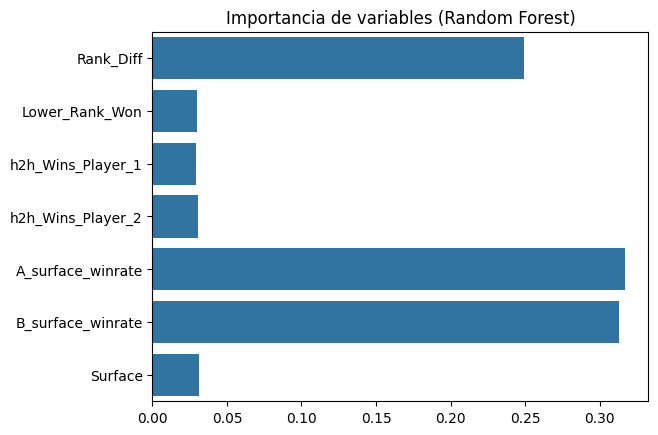

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Importancia de variables (Random Forest)")
plt.show()


In [11]:
import joblib

joblib.dump(rf, "../models/random_forest.pkl")
joblib.dump(log_reg, "../models/log_reg.pkl")


['../models/log_reg.pkl']

In [16]:
# Ejemplo: un partido hipotético
partido = pd.DataFrame([{
    "Rank_Diff": 15,
    "Lower_Rank_Won": 1,    
    "h2h_Wins_Player_1": 10,
    "h2h_Wins_Player_2": 1,
    "A_surface_winrate": 0.6,
    "B_surface_winrate": 0.4,
    "Surface": 0   # Hard
}])

# Predicción
proba = rf.predict_proba(partido)[0][1]  # prob de que gane A
print(f"Probabilidad de que gane el jugador A: {proba:.2f}")

Probabilidad de que gane el jugador A: 0.60
